# Customer Segmentation 

##### Table of Content

- **1. Objective**
- **2. Data**
- **3. Data Visualisation**
- **4. Cluster Analysis**
- 4.1 K-Means Clustering
- 4.2 DBSCAN
- 4.3 Hierarchial Clustering
- 4.3.1 Aglomerative Clustering
- 4.4 Mean Shift
- **5. Model Comparision** 

## 1. Objective

The objective of this project to figure out the clusters of customers with high income and low spending score. THe earlier mentioned customers might be used for marketing purposes. In order to determine customers, **Unsupervised Machine Learning** tolls will be used. Unsupervised Machine learning allows AI to build new datasets and begin finding patterns on its own. 



## 2. Data

In [1]:
# Importing Essential libraries:

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pltm

from pandas import Series, DataFrame
from matplotlib import rcParams
from matplotlib import pyplot

In [2]:
# Downloading data

df = pd.read_csv('/Users/ruhidmirzayev/Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Dropping unrelated variable

df = df.drop(['CustomerID'], axis = 1)

# Changing column names for sake of simplicity
df.columns = ['Gender', 'Age', 'Income', 'Spending_Score']

# Describing the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [5]:
# Data description based on Female
df[df['Gender'] == 'Female'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,112.0,38.098214,12.644095,18.0,29.00,35.0,47.50,68.0
Income,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Spending_Score,112.0,51.526786,24.114950,5.0,35.00,50.0,73.00,99.0


In [6]:
# Data description based on Male
df[df['Gender'] == 'Male'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
Income,88.0,62.227273,26.638373,15.0,45.50,62.5,78.0,137.0
Spending_Score,88.0,48.511364,27.896770,1.0,24.50,50.0,70.0,97.0


**Initial insights**
- Males make average $3K more moeny.
- Females are more likely to spend money.

## 3. Data Visualisation

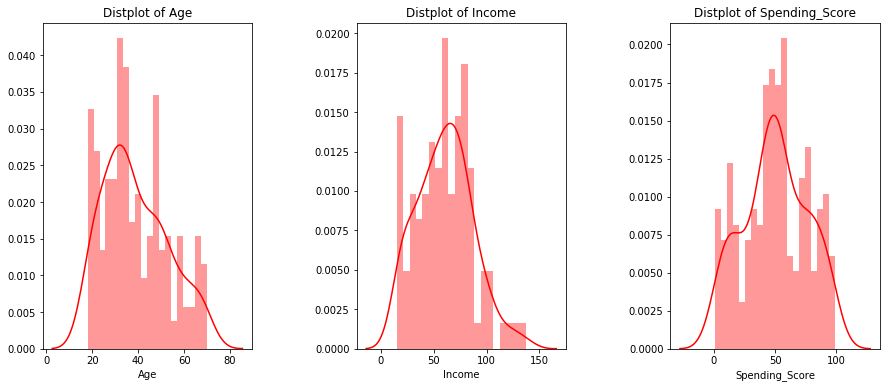

In [8]:
# Displot of the Data

pltm.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Income' , 'Spending_Score']:
    n += 1
    pltm.subplot(1 , 3 , n)
    pltm.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sb.distplot(df[x] , bins = 20, color = 'red')
    pltm.title('Distplot of {}'.format(x))
pltm.show()

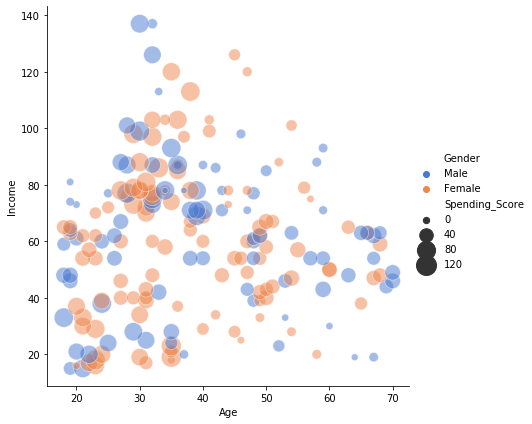

In [11]:
# Relplot for understanding spending score based on age, income and age features.
sb.relplot(x="Age", y="Income", hue="Gender", size="Spending_Score",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

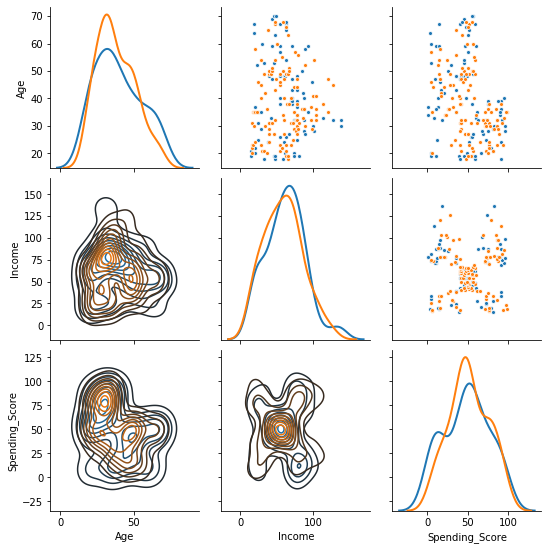

In [12]:
# Paired density and scarplot matrix.

df1 = df[['Age', 'Income', 'Spending_Score', 'Gender']]
r = sb.PairGrid(df1,hue='Gender', diag_sharey=False)
r.map_upper(sb.scatterplot, s=15)
r.map_lower(sb.kdeplot)
r.map_diag(sb.kdeplot, lw=2)

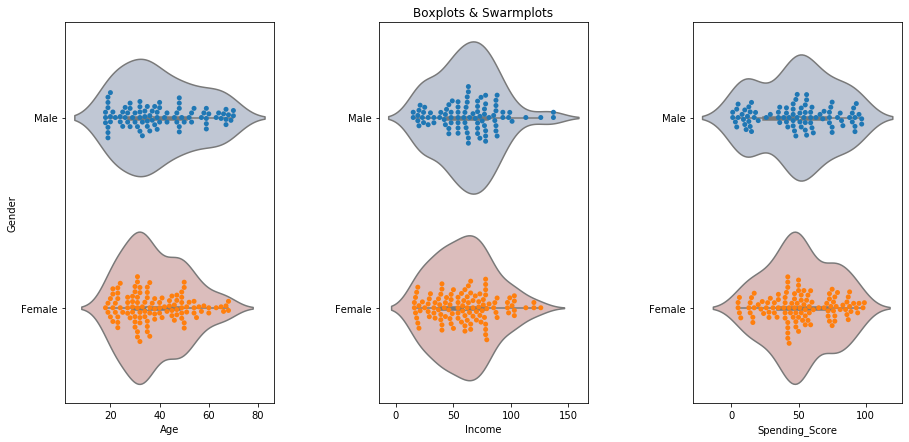

In [13]:
# Violin and Swarm Plots.
pltm.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Income' , 'Spending_Score']:
    n += 1 
    pltm.subplot(1 , 3 , n)
    pltm.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sb.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sb.swarmplot(x = cols , y = 'Gender' , data = df)
    pltm.ylabel('Gender' if n == 1 else '')
    pltm.title('Boxplots & Swarmplots' if n == 2 else '')
pltm.show()

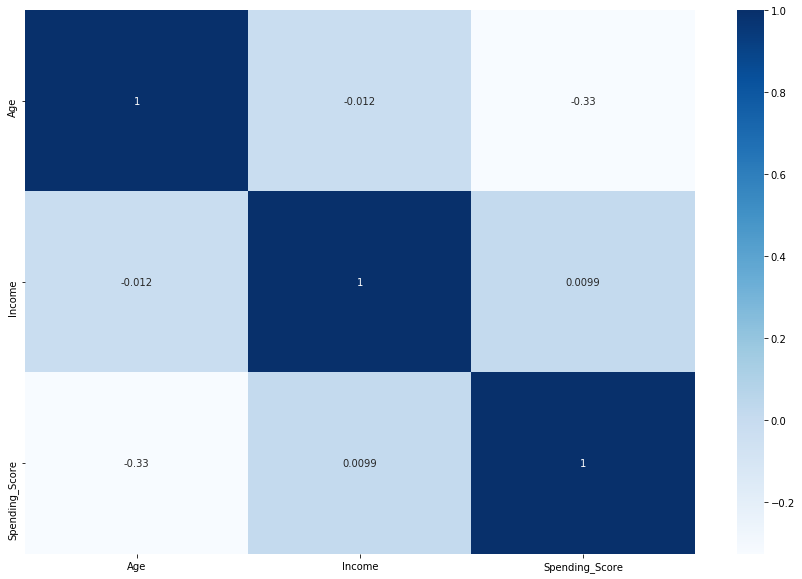

In [16]:
# Let's draw a heatmap with the numeric values in each cell to check correlation between variables.

corr = df.corr()
pltm.figure(figsize=(15,10))
sb.heatmap(corr, cmap='Blues', annot = True)
pltm.show()

Age and spending score is negatively correlated, it means that as age goes up,people are less likely to spend money.

## 4. Cluster Analysis

#### 4.1 K-Means Clustering

**k-means clustering** is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In [21]:
# Importing library
from sklearn.cluster import KMeans 

# Let's define our features
X = df[['Age', 'Income', 'Spending_Score']]

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM = KMeans(n_clusters=n, init='k-means++').fit(X)
    clusters_inertia.append(KM.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X, KM.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method


**The “elbow” method** helps data scientists to select the optimal number of clusters by fitting the model with a range of values for 𝐾. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

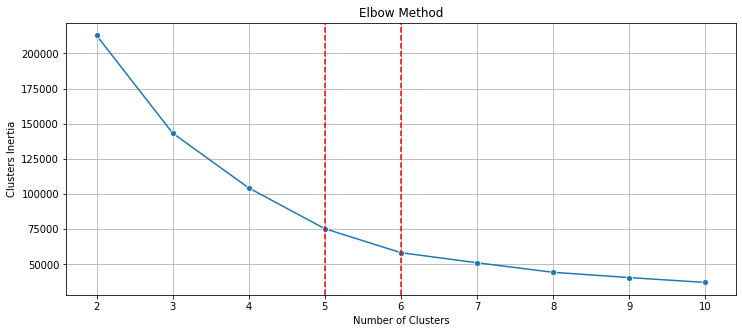

In [25]:
fig, ax = pltm.subplots(figsize=(12,5))
ax = sb.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Clusters Inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
pltm.grid()
pltm.show()

**Silhouette Coefficient or silhouette score** is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
- 1: Means clusters are well apart from each other and clearly distinguished.
- 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: Means clusters are assigned in the wrong way.


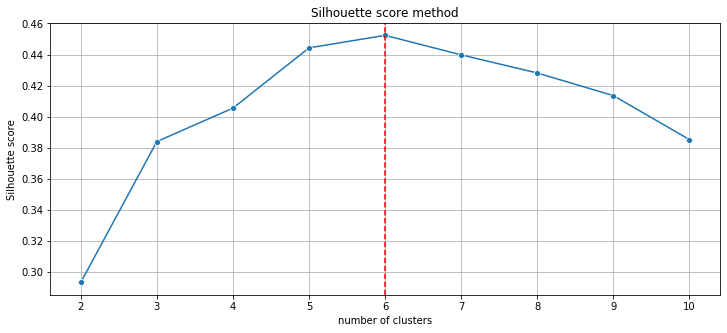

In [27]:
fig, ax = pltm.subplots(figsize=(12,5))
ax = sb.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
pltm.grid()
pltm.show()

As we see from above, the elbow method shows 5 or 6 clusters, silhouette score methos shows 6. We can try both of them.

 **Cluster = 5**

In [28]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X) # initialise and fit K-Means model

KM5_clustered = X.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

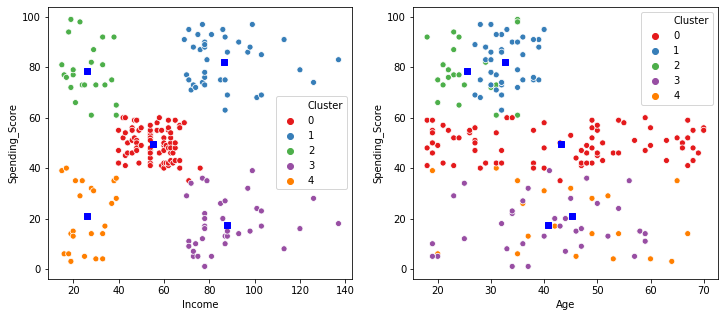

In [29]:
# Visualasing data
fig1, (axes) = pltm.subplots(1,2,figsize=(12,5))


scat_1 = sb.scatterplot('Income', 'Spending_Score', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sb.scatterplot('Age', 'Spending_Score', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
pltm.show()

K-Means algorithm generated 5 clusters as below in terms of income:
* Customers with **low** annual income and **high** spending score - green dots.
* Customers with **medium** annual income and **medium** spending score - red dots.
* Customers with **high** annual income and **low** spending score - purple dots. They might be target for marketing purposes.
* Customers with **high** annual income and **high** spending score.
* Customers with **low** annual income and **low** spending score.

When it comes to age group, it is hard to find clusters to interpret.

In [31]:
# Let's define cluster sizes
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["K-Means size"]
KM_clust_sizes

,K-Means size
Cluster,
0,79
1,39
2,23
3,36
4,23


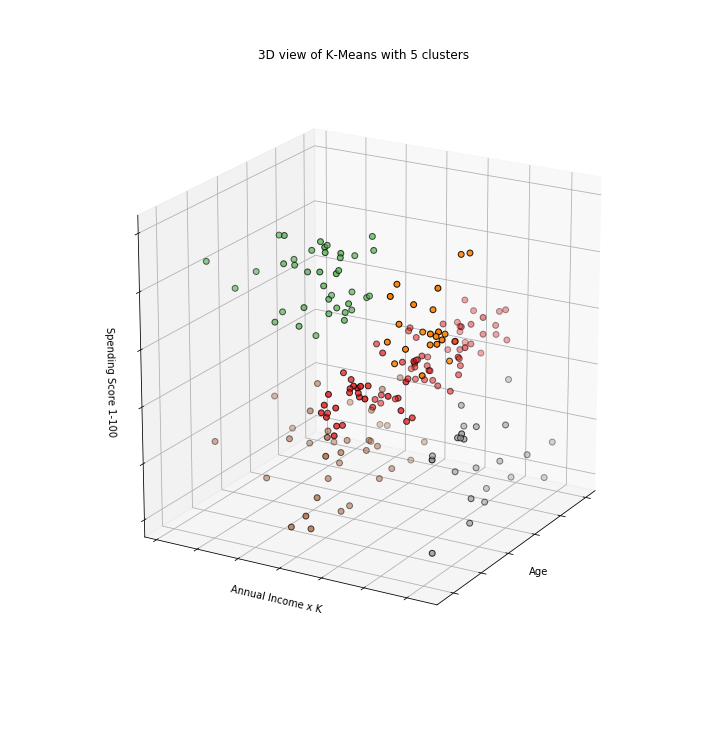

In [33]:
# 3D visualisation to see better. 
from mpl_toolkits.mplot3d import Axes3D

fig = pltm.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Income'],
           KM5_clustered['Spending_Score'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income x K')
ax.set_zlabel('Spending Score 1-100')
ax.set_title('3D view of K-Means with 5 clusters')
ax.dist = 12

pltm.show()

**Clusters** = 6

In [34]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X) # initialise and fit K-Means model

KM6_clustered = X.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

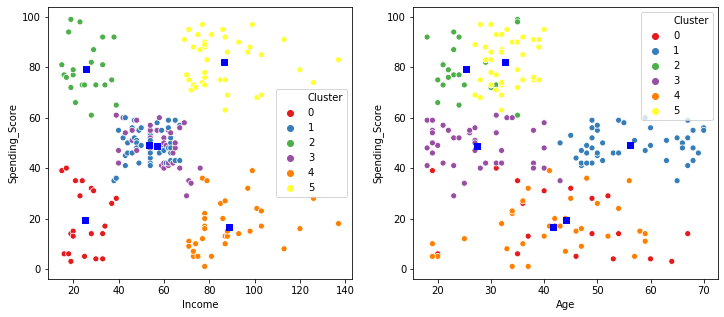

In [35]:
fig11, (axes) = pltm.subplots(1,2,figsize=(12,5))

sb.scatterplot('Income', 'Spending_Score', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sb.scatterplot('Age', 'Spending_Score', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
pltm.show()

K-Means algorithm generated the following 6 clusters:
<ol start="0">
    <li>Younger customers with **medium** annual and **medium** spending score</li>
    <li>Customers with **high** annual income and **low** spending score</li>
    <li>Younger customers with **medium** annual and **medium** spending score</li>
    <li>Customers with **high** annual income and **high** spending score</li>
    <li>Customers with **low** annual income and **low** spending score</li>
    <li>Customers with **low** annual income and **high** spending score</li>
</ol>

It is hard to define distinct groups is terms of customers age.

In [36]:
# Let's define cluster sizes
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["K-Mmeans size"]
KM6_clust_sizes

,K-Mmeans size
Cluster,
0,21
1,45
2,22
3,39
4,34
5,39


#### 4.2 DBSCAN

Density-based spatial clustering of applications with noise(DBSCAN) is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature. 

Advantages of DBSCAN:
- DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means.
- DBSCAN can find arbitrarily-shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster. Due to the MinPts parameter, the so-called single-link effect (different clusters being connected by a thin line of points) is reduced.
- DBSCAN has a notion of noise, and is robust to outliers.
- DBSCAN requires just two parameters and is mostly insensitive to the ordering of the points in the database. (However, points sitting on the edge of two different clusters might swap cluster membership if the ordering of the points is changed, and the cluster assignment is unique only up to isomorphism.)
- DBSCAN is designed for use with databases that can accelerate region queries, e.g. using an R* tree.
- The parameters minPts and ε can be set by a domain expert, if the data is well understood.

Disadvantages of DBSCAN:
- DBSCAN is not entirely deterministic: border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data are processed. For most data sets and domains, this situation does not arise often and has little impact on the clustering result:[4] both on core points and noise points, DBSCAN is deterministic. DBSCAN*[8] is a variation that treats border points as noise, and this way achieves a fully deterministic result as well as a more consistent statistical interpretation of density-connected components.
- The quality of DBSCAN depends on the distance measure used in the function regionQuery(P,ε). The most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for ε. This effect, however, is also present in any other algorithm based on Euclidean distance.
- DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-ε combination cannot then be chosen appropriately for all clusters.[9]
- If the data and scale are not well understood, choosing a meaningful distance threshold ε can be difficult.

In [38]:
# Importing library
from sklearn.cluster import DBSCAN

In [39]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [41]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

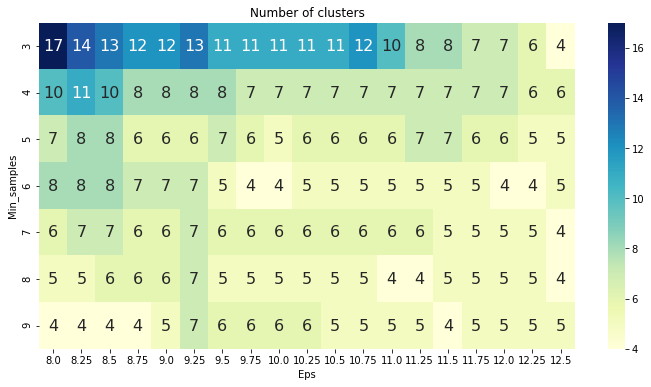

In [44]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = pltm.subplots(figsize=(12,6))
sb.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
pltm.show()

As the heatplot above shows, the number of clusters vary from 17 to 4.

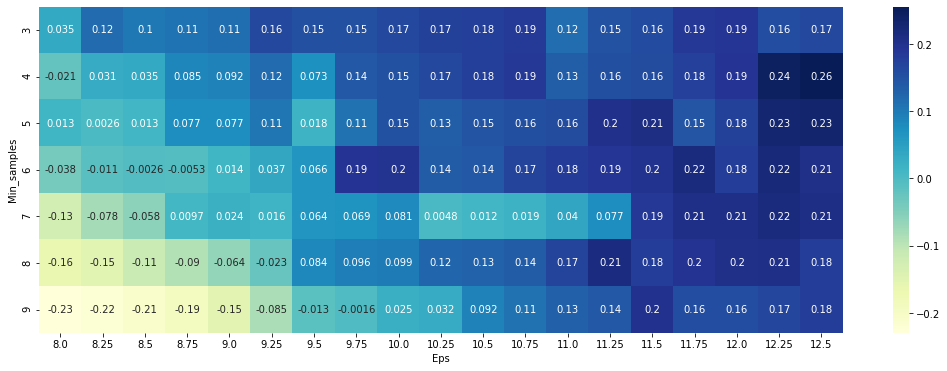

In [46]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = pltm.subplots(figsize=(18,6))
sb.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
pltm.show()

Global maximum is 0.26 for eps=12.5 and min_samples=4.

In [47]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)

DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [48]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


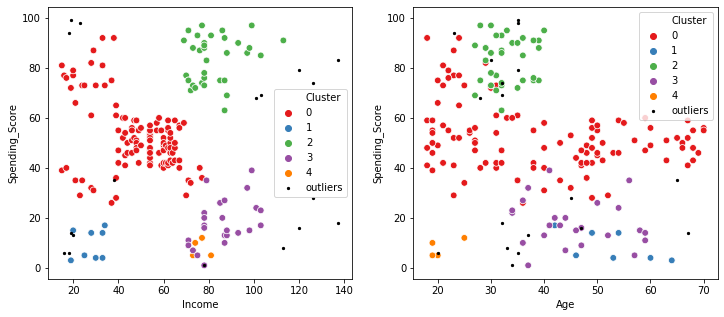

In [54]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = pltm.subplots(1,2,figsize=(12,5))


sb.scatterplot('Income', 'Spending_Score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sb.scatterplot('Age', 'Spending_Score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Income'], outliers['Spending_Score'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending_Score'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

pltm.setp(axes[0].get_legend().get_texts(), fontsize='10')
pltm.setp(axes[1].get_legend().get_texts(), fontsize='10')

pltm.show()

The graph above shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognised as a cluster.

#### 4.3 Hierarchial Clustering 

In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

In [55]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


In [56]:
Z = hierarchy.linkage(dist, 'complete')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


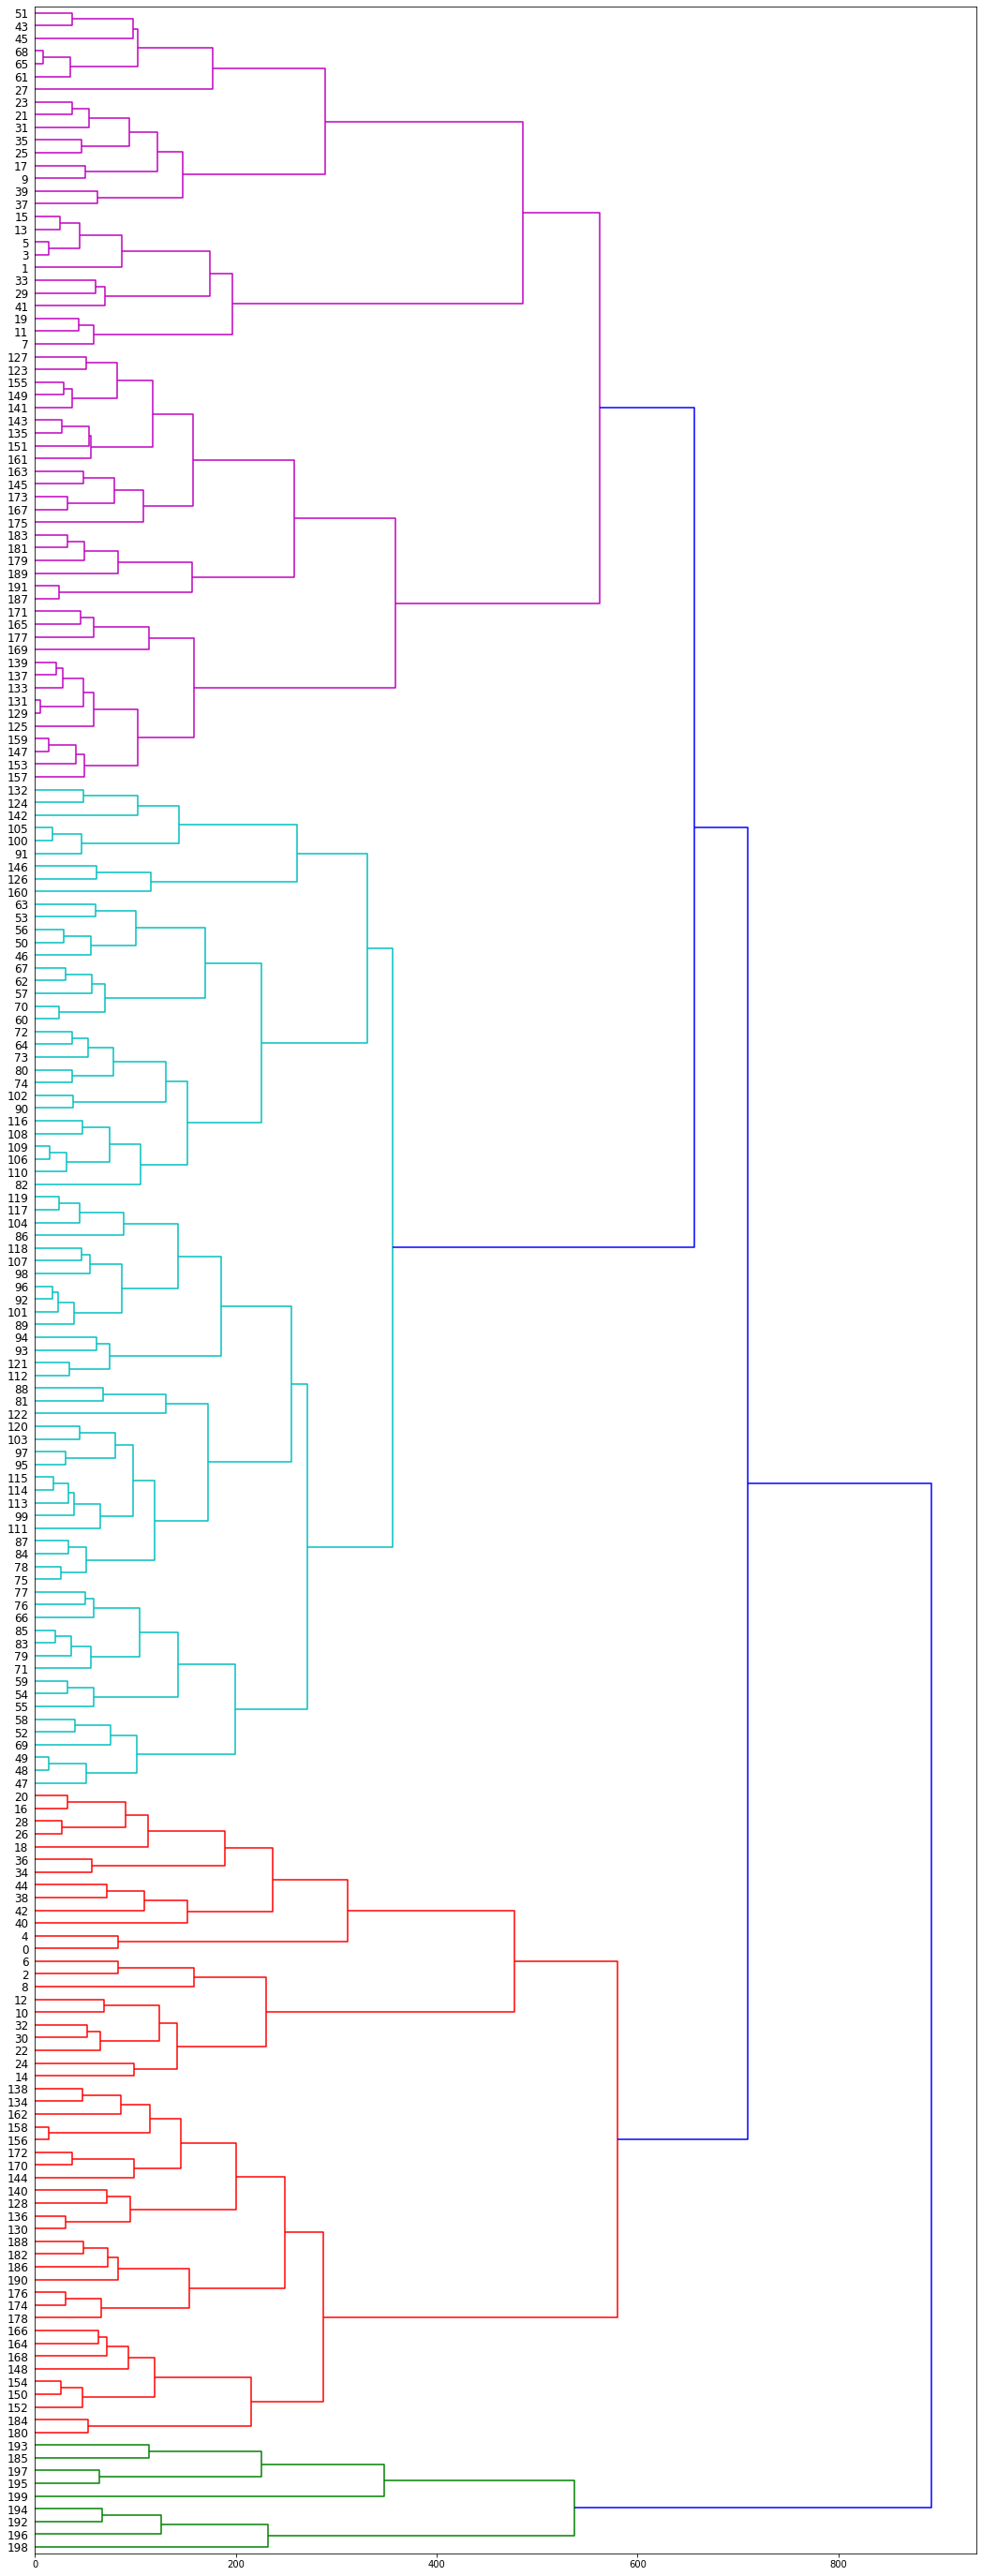

In [58]:
pltm.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


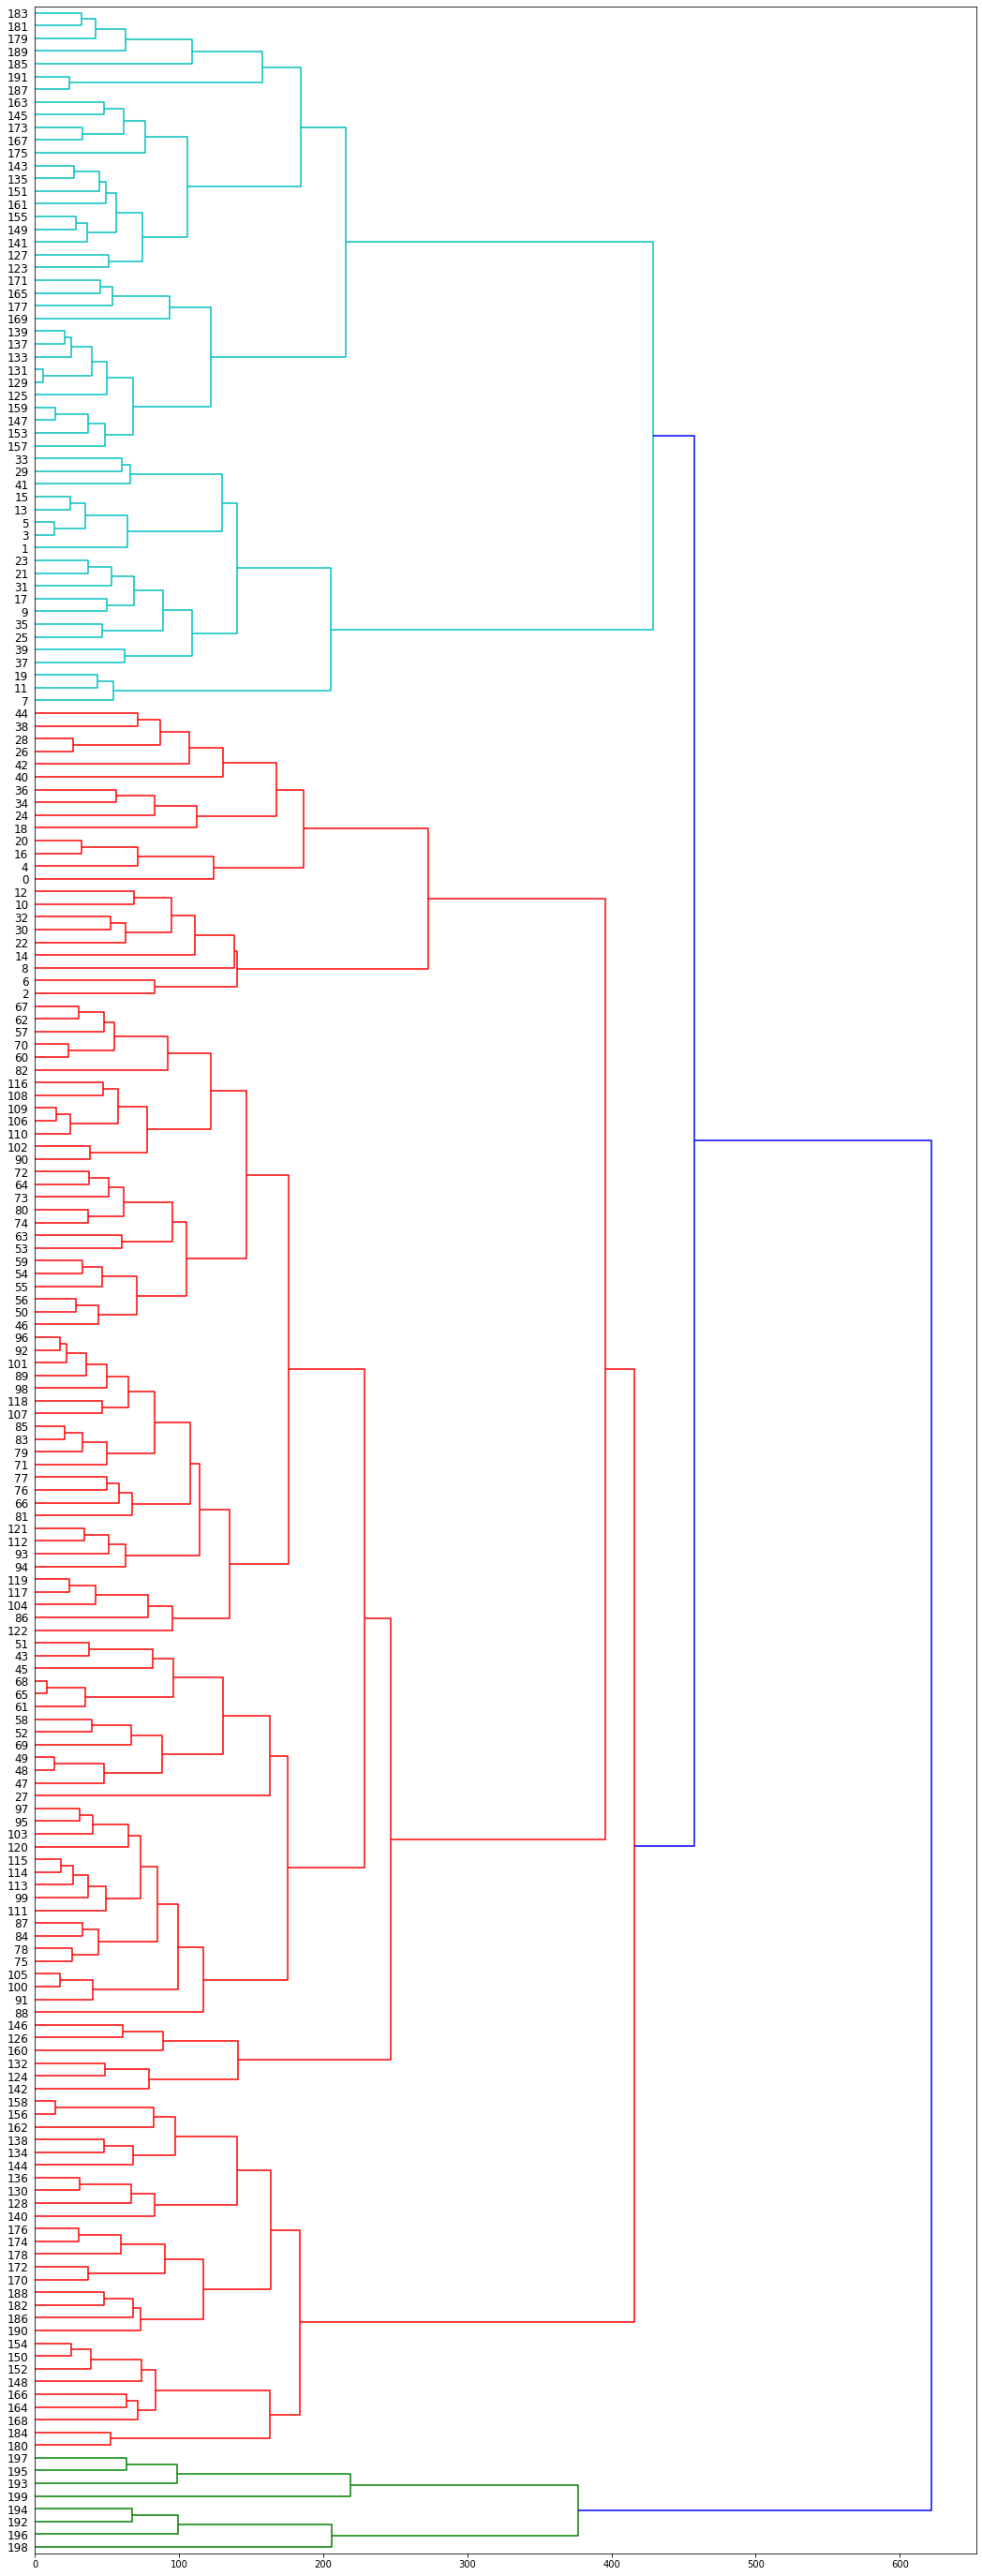

In [60]:
Z = hierarchy.linkage(dist, 'average')
pltm.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### 4.3.1 Aglomerative 

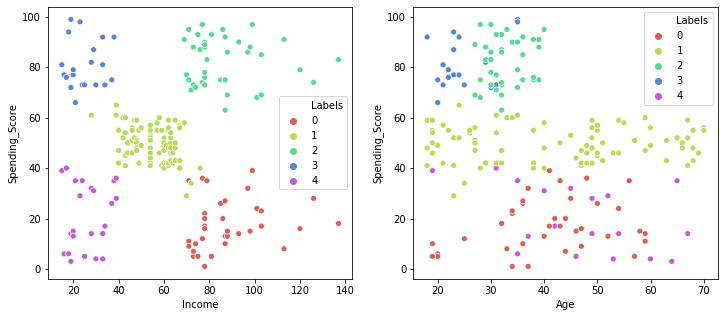

<Figure size 864x576 with 0 Axes>

In [74]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

fig2, (axes) = pltm.subplots(1,2,figsize=(12,5))

X['Labels'] = agglom.labels_
pltm.figure(figsize=(12, 8))
sb.scatterplot(X['Income'], X['Spending_Score'], hue=X['Labels'], ax = axes[0],
                palette=sb.color_palette('hls', 5))
sb.scatterplot(X['Age'], X['Spending_Score'], hue=X['Labels'], ax = axes[1],
                palette=sb.color_palette('hls', 5))

pltm.show()

### 4.4 Mean Shift

Mean shift is a non-parametric feature-space analysis technique for locating the maxima of a density function, a so-called mode-seeking algorithm. Application domains include **cluster analysis** in computer vision and image processing.

Consider a set of points in two-dimensional space. Assume a circular window centered at C and having radius r as the kernel. Mean shift is a hill climbing algorithm which involves shifting this kernel iteratively to a higher density region until convergence. Every shift is defined by a mean shift vector. The mean shift vector always points toward the direction of the maximum increase in the density. At every iteration the kernel is shifted to the centroid or the mean of the points within it. The method of calculating this mean depends on the choice of the kernel. In this case if a Gaussian kernel is chosen instead of a flat kernel, then every point will first be assigned a weight which will decay exponentially as the distance from the kernel's center increases. At convergence, there will be no direction at which a shift can accommodate more points inside the kernel.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass bandwidth=22.19763144071063 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


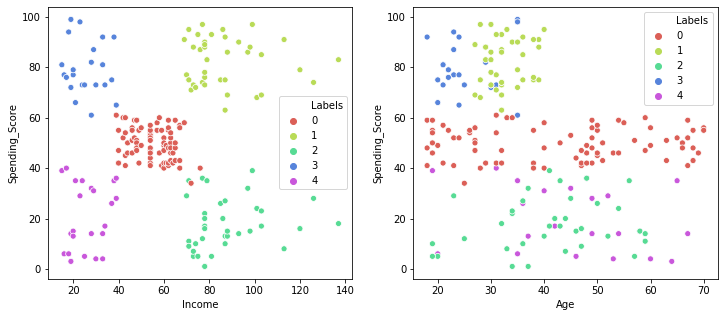

In [71]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

fig2, (axes) = pltm.subplots(1,2,figsize=(12,5))

X['Labels'] = ms.labels_

sb.scatterplot(X['Income'], X['Spending_Score'], hue=X['Labels'], ax = axes[0],
                palette=sb.color_palette('hls', np.unique(ms.labels_).shape[0]))
sb.scatterplot(X['Age'], X['Spending_Score'], hue=X['Labels'], ax = axes[1],
                palette=sb.color_palette('hls', np.unique(ms.labels_).shape[0]))

pltm.plot()
pltm.show()

## 5. Model Comparision

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass bandwidth=22.197710459485066 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


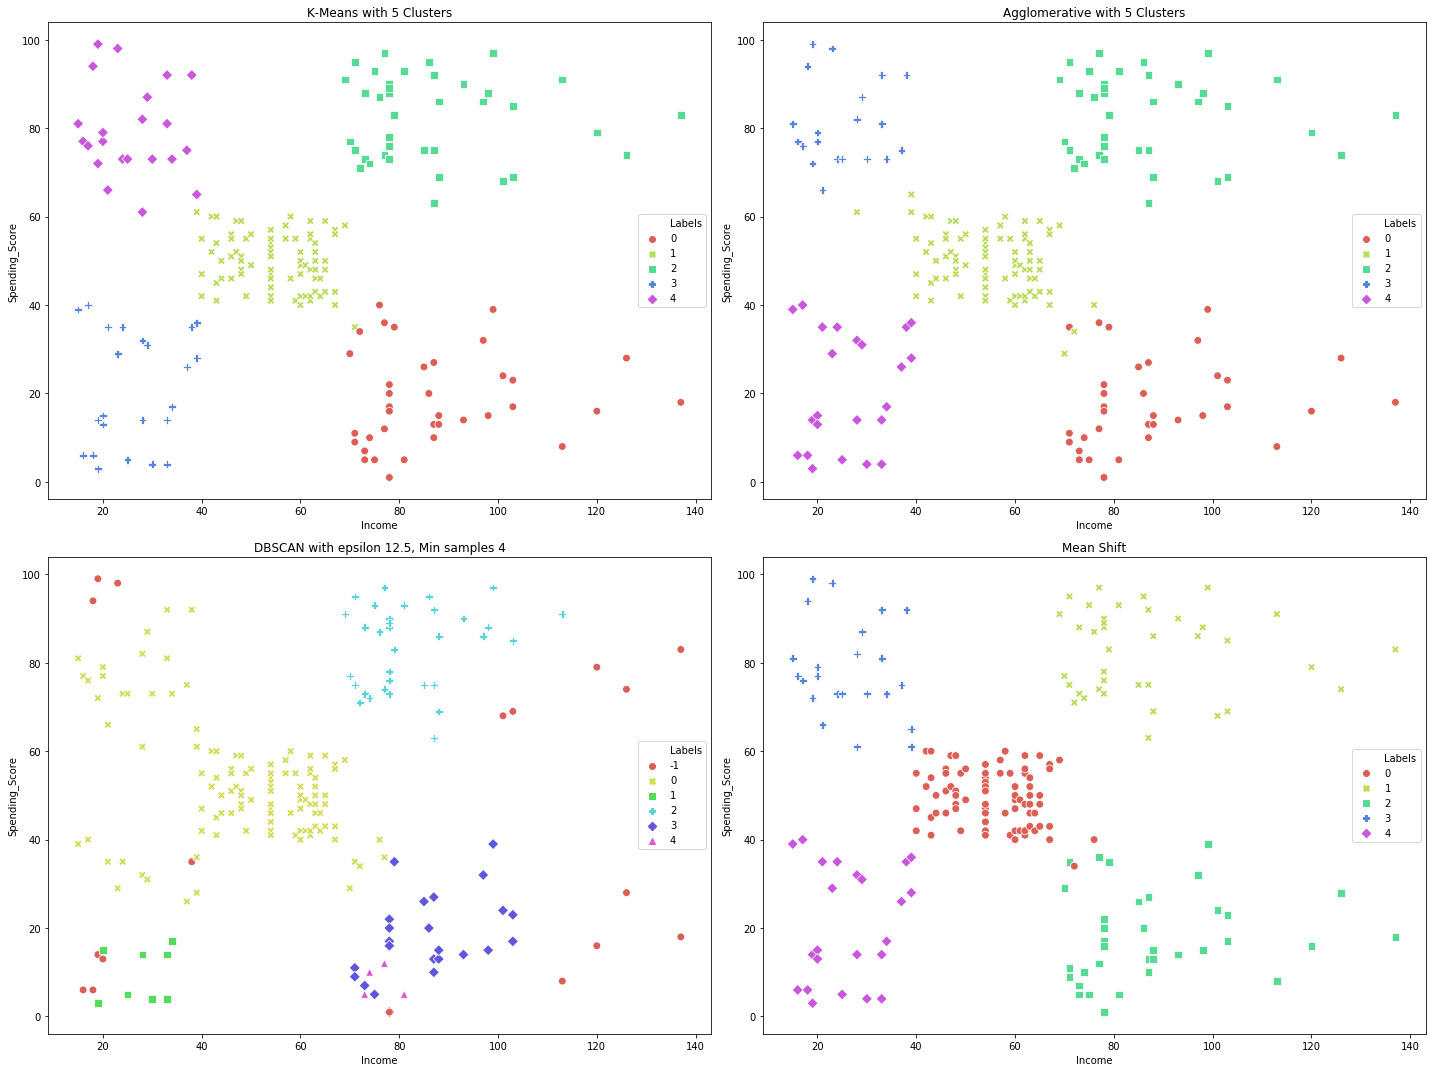

In [76]:
fig = pltm.figure(figsize=(20,15))

#-----------------------------------------------------------------------------------
# KMeans 
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sb.scatterplot(X['Income'], X['Spending_Score'], hue=X['Labels'], style=X['Labels'],
                palette=sb.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('K-Means with 5 Clusters')

#-----------------------------------------------------------------------------------

# Agglomerative Clustering
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sb.scatterplot(X['Income'], X['Spending_Score'], hue=X['Labels'], style=X['Labels'],
                palette=sb.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')

#-----------------------------------------------------------------------------------

# DBSCAN 
ax = fig.add_subplot(223)

db = DBSCAN(eps=12.5, min_samples=4).fit(X)
X['Labels'] = db.labels_
sb.scatterplot(X['Income'], X['Spending_Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sb.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 12.5, Min samples 4')

#-----------------------------------------------------------------------------------

# MEAN SHIFT
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sb.scatterplot(X['Income'], X['Spending_Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sb.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('Mean Shift')

pltm.tight_layout()
pltm.show()